# Trabajo evaluable de Python

El dataset que se ha escogido para este trabajo es [Congressional Voting Records](https://archive.ics.uci.edu/ml/datasets/congressional+voting+records), que se encuentra en el repositorio de datasets de UCI. EL dataset recoge los votos de cada congresista del nonagésimo octavo congreso de los Estados Unidos sobre 16 elementos clave identificados por el Congressional Quarterly (CQA). El CQA identifica 9 tipos de votos: voto a favor, posición a favor, anunciado a favor (estos tres se han simplificado a "yes"), voto en contra, posición en contra, anunciado en contra (estos tres se han simplificado a "no"), vota abstención, vota abstención por conflicto de intereses y no vota o no se conoce la posición (estos últimos tres se simplifican a valor perdido).
Los atributos de este dataset son los siguientes:
- **handicapped-infants**. Variable binaria
- **water-project-cost-sharing**. Variable binaria
- **adoption-of-the-budget-resolution**. Variable binaria
- **physician-fee-freeze**. Variable binaria
- **el-salvador-aid**. Variable binaria
- **religious-groups-in-schools**. Variable binaria
- **anti-satellite-test-ban**. Variable binaria
- **aid-to-nicaraguan-contras**. Variable binaria
- **mx-missile**. Variable binaria
- **immigration**. Variable binaria
- **synfuels-corporation-cutback**. Variable binaria
- **education-spending**. Variable binaria
- **superfund-right-to-sue**. Variable binaria
- **crime**. Variable binaria
- **duty-free-exports**. Variable binaria
- **export-administration-act-south-africa**. Variable binaria

La variable a predecir es **Class** que toma los valores "democrat" o "republican"

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [6]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
    header=None,
    names=[
        "Class",
        "handicapped-infants",
        "water-project-cost-sharing",
        "adoption-of-the-budget-resolution",
        "physician-fee-freeze",
        "el-salvador-aid",
        "religious-groups-in-schools",
        "anti-satellite-test-ban",
        "aid-to-nicaraguan-contras",
        "mx-missile",
        "immigration",
        "synfuels-corporation-cutback",
        "education-spending",
        "superfund-right-to-sue",
        "crime",
        "duty-free-exports",
        "export-administration-act-south-africa"
    ]
)

Class = data.pop("Class")
data["Class"] = Class

In [7]:
data

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


Como se observa, existen valores perdidos en las diferente columnas y esto se debe a que los autores de este dataset han identificado los votos de abstención como valores perdidos. Lo que se va a hacer es sustituir esos valores perdidos por el valor "p" (que viene de present cuyo significado es abstención) y por lo tanto, las columnas con valores binarios se convertirán en valores categóricos.

In [8]:
data.where(data != '?', 'p', inplace=True)

Una vez hecho esto, separamos los predictores y la clase en diferentes variables

In [39]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [40]:
enc = OneHotEncoder()
X = enc.fit_transform(X).toarray()
X = pd.DataFrame(meow, columns=enc.get_feature_names_out())
X

,handicapped-infants_n,handicapped-infants_p,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_p,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_p,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,...,superfund-right-to-sue_y,crime_n,crime_p,crime_y,duty-free-exports_n,duty-free-exports_p,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_p,export-administration-act-south-africa_y
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
431,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
432,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
433,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
Y

0      republican
1      republican
2        democrat
3        democrat
4        democrat
          ...    
430    republican
431      democrat
432    republican
433    republican
434    republican
Name: Class, Length: 435, dtype: object

A continuación se aplica una reducción de dimensionalidad utilizando PCA. Se va a probar a reducir a 2 y 3 dimensiones. Cada ejecución ira acompañado de un scatter plot.

<IPython.core.display.Javascript object>


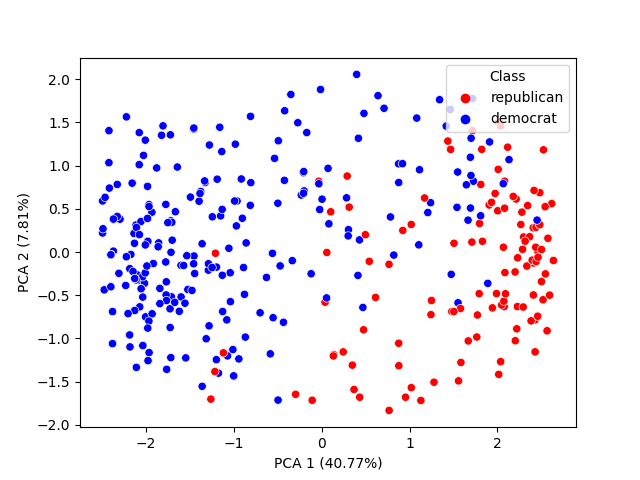

<AxesSubplot:xlabel='PCA 1 (40.77%)', ylabel='PCA 2 (7.81%)'>

In [67]:
%matplotlib notebook
pca = PCA(n_components=2)
pca_x = pd.DataFrame(pca.fit_transform(X), columns=["PCA1", "PCA2"])
variance_ratio = pca.explained_variance_ratio_

ax = sns.scatterplot(
    data=pca_x,
    x="PCA1",
    y="PCA2",
    hue=Y,
    palette={
        'republican': 'red',
        'democrat': 'blue'
    }
)
ax.set(
    xlabel=f'PCA 1 ({round(variance_ratio[0]*100, 2)}%)',
    ylabel=f'PCA 2 ({round(variance_ratio[1]*100, 2)}%)'
)
ax

<IPython.core.display.Javascript object>


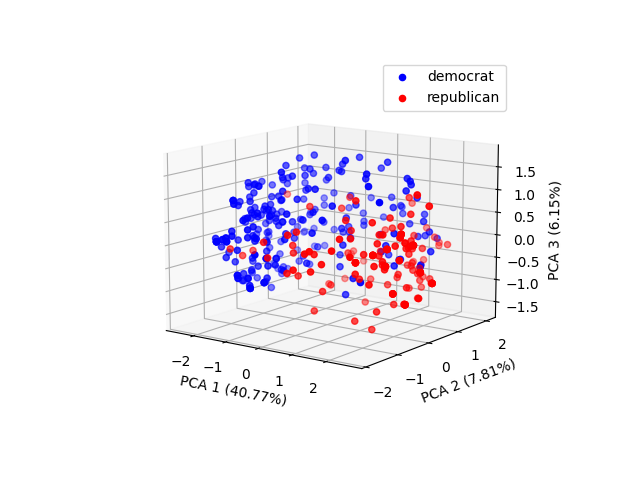

In [72]:
%matplotlib notebook
pca_3_d = PCA(n_components=3)
pca_x_3_d = pd.DataFrame(pca_3_d.fit_transform(X), columns=["PCA1", "PCA2", "PCA3"])
variance_ratio_3d = pca_3_d.explained_variance_ratio_

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')

for label, color in zip(['democrat', 'republican'], ['blue', 'red']):
    ax1.scatter(
        pca_x_3_d.iloc[(Y == label).values, 0],
        pca_x_3_d.iloc[(Y == label).values, 1],
        pca_x_3_d.iloc[(Y == label).values, 2],
        c=color,
        label=label
    )
ax1.set_xlabel(f'PCA 1 ({round(variance_ratio_3d[0]*100, 2)}%)')
ax1.set_ylabel(f'PCA 2 ({round(variance_ratio_3d[1]*100, 2)}%)')
ax1.set_zlabel(f'PCA 3 ({round(variance_ratio_3d[2]*100, 2)}%)')

ax1.legend()
plt.show()

array([False, False,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True,